In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

print(tf.__version__)

1.12.0


In [35]:
def loadDatasets():
    
    #dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
    dataset_path = os.getcwd() + (r"\datasets\auto-mpg.data")
    column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                    'Acceleration', 'Model Year', 'Origin'] 
    raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values = "?", comment='\t',
                          sep=" ", skipinitialspace=True)
    dataset = raw_dataset.copy()
    dataset = dataset.dropna()
    origin = dataset.pop('Origin')
    dataset['USA'] = (origin == 1)*1.0
    dataset['Europe'] = (origin == 2)*1.0
    dataset['Japan'] = (origin == 3)*1.0

    train_dataset = dataset.sample(frac=0.8,random_state=0)
    test_dataset = dataset.drop(train_dataset.index)
    
    sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

### Main

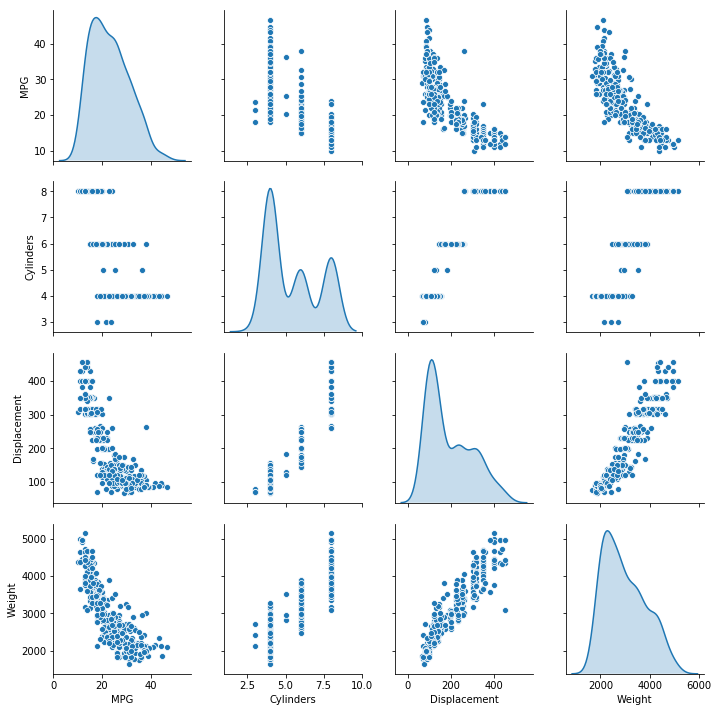

In [36]:
if __name__ == "__main__":
    loadDatasets()